# Importing essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

In [2]:
water_quality_df = pd.read_csv('water_potability.csv')
print(water_quality_df.head(5))

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


# Exploratory Data Analysis

In [3]:
print(f'Rows and columns {water_quality_df.shape}')

Rows and columns (3276, 10)


In [4]:
print(f'Attribute Information = {water_quality_df.columns}')

Attribute Information = Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [5]:
water_quality_df.isnull().sum() ## Checking how many of the rows are empty

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
# Filling the empty cell with the mean of that feature
water_quality_df['ph'].fillna(water_quality_df['ph'].mean(), inplace=True)
water_quality_df['Sulfate'].fillna(water_quality_df['Sulfate'].mean(), inplace=True)
water_quality_df['Trihalomethanes'].fillna(water_quality_df['Trihalomethanes'].mean(), inplace=True)

In [7]:
water_quality_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
water_quality_df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

# Data Visualization

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


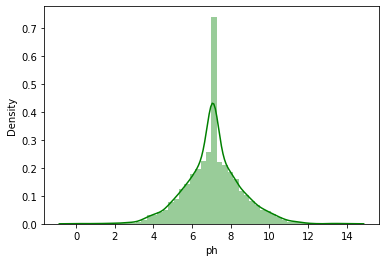

In [9]:
sns.distplot(water_quality_df['ph'], color='g')
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


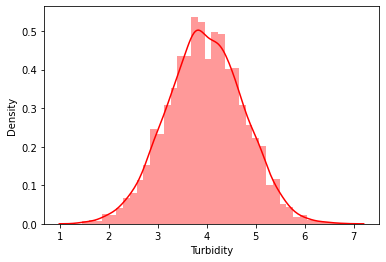

In [10]:
sns.distplot(water_quality_df['Turbidity'], color='r')
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


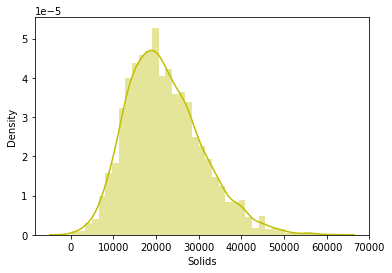

In [11]:
sns.distplot(water_quality_df['Solids'], color='y')
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


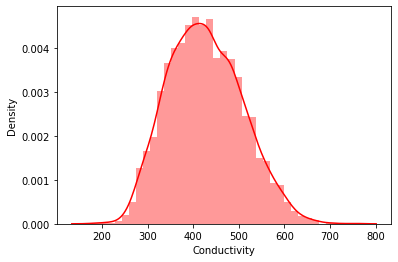

In [12]:
sns.distplot(water_quality_df['Conductivity'], color='r')
plt.show()

# Displaying Histogram of each Features

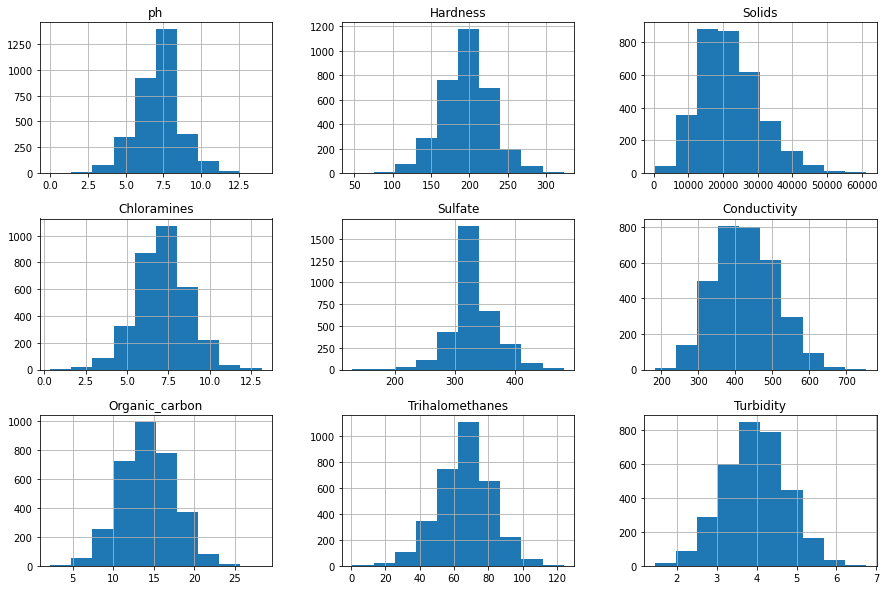

In [13]:
features_df = water_quality_df.drop('Potability', axis=1)
features_df.hist(figsize=(15,10))
plt.show()

# Checking Correlation between the features

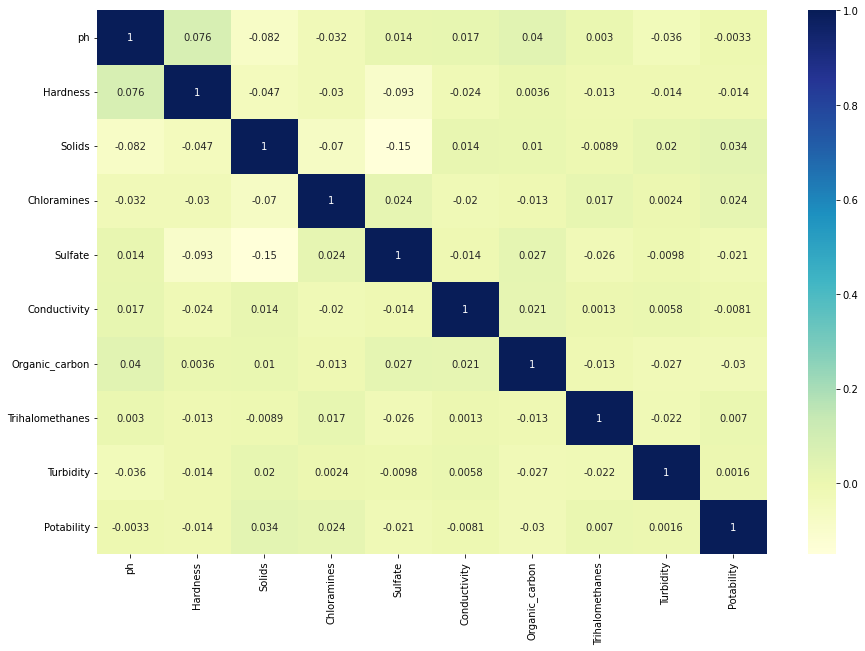

In [14]:
# This is done to select those features/attributes which would help in making the model better in prediction
plt.figure(figsize=(15,10))
sns.heatmap(water_quality_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

<AxesSubplot:>

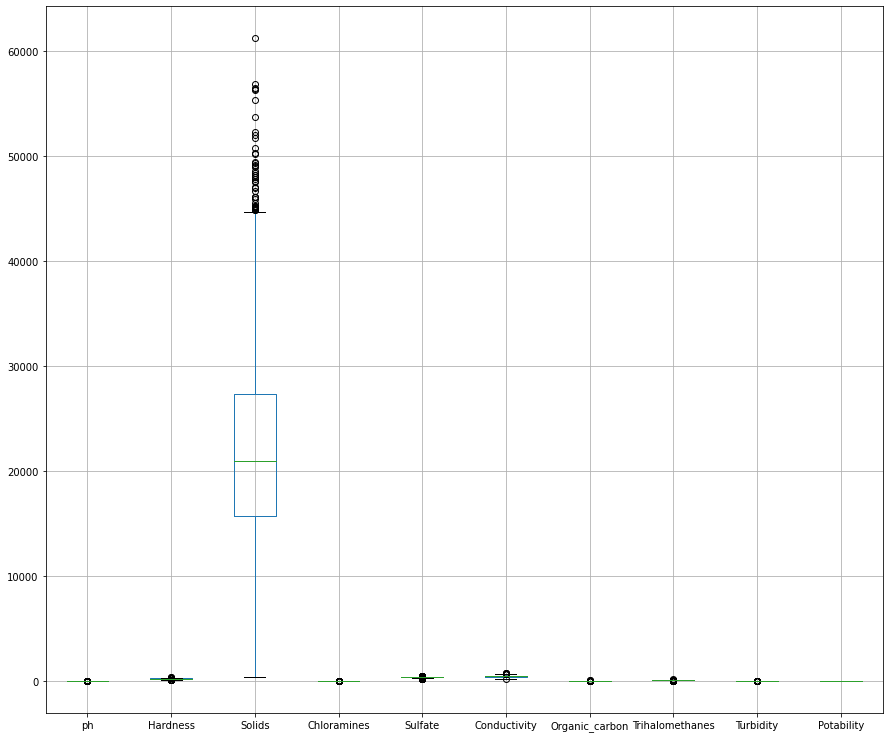

In [15]:
# Boxplotting (To check the outlier)
water_quality_df.boxplot(figsize=(15,13))

# Data Normalization

In [16]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
water_quality_df_norm = pd.DataFrame(data= scaler.fit_transform(water_quality_df), columns=water_quality_df.columns)
water_quality_df_norm.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
5,0.398863,0.511010,0.466746,0.563043,0.561537,0.173092,0.237538,0.439550,0.209814,0.0
6,0.730276,0.727768,0.466763,0.560580,0.751819,0.178659,0.444050,0.680385,0.231233,0.0
7,0.616846,0.565593,0.219208,0.329629,0.495155,0.512581,0.389418,0.503483,0.558031,0.0
8,0.505771,0.259553,0.229281,0.583340,0.396690,0.363537,0.402531,0.431527,0.405562,0.0
9,0.798592,0.652175,0.413152,0.682990,0.781300,0.668699,0.602598,0.577945,0.552195,0.0


# Dividing the dataset

In [17]:
water_X = water_quality_df_norm.drop('Potability', axis=1)
water_Y = water_quality_df_norm['Potability']

In [18]:
# For training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(water_X, water_Y, test_size=0.2, random_state=101)

# Training using Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators = 200, criterion = 'gini')
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

## Testing Data

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

prediction = random_forest_model.predict(X_test)
print(f'Accuracy score = {round(accuracy_score(Y_test, prediction)*100, 3)} %')

Accuracy score = 69.36 %
The confusion matrix = [[354 153]
 [ 48 101]]


## Score on train and test

In [21]:
print(f'Training Score = {random_forest_model.score(X_train, Y_train) * 100}')
print(f'Testing Score = {random_forest_model.score(X_test, Y_test) * 100}')

Training Score = 100.0
Testing Score = 69.35975609756098


In [22]:
print(f'The confusion matrix = {confusion_matrix(prediction, Y_test)}')

The confusion matrix = [[354 153]
 [ 48 101]]


## Testing our own data

In [23]:
my_data ={
    'ph':[7], 
    'Hardness':[111], 
    'Solids':[120], 
    'Chloramines':[2], 
    'Sulfate':[3],
    'Conductivity':[3],
       'Organic_carbon':[4],
    'Trihalomethanes':[3], 
    'Turbidity':[2]
}

inp_data = pd.DataFrame(my_data)

In [24]:
temp_val = random_forest_model.predict(inp_data)
print(temp_val)

if temp_val == 0:
    print(f'Water is not Potable')
else:
    print(f'Water is Potable')

[1.]
Water is Potable


## Hyperparameter Tuning

In [25]:
# Here, try to use GridCVSearch instead of RandomizedCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search_model = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

rand_search_model.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A60BEACC40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A60BEAD7B0>})

In [26]:
prediction = rand_search_model.predict(X_test)
print(f'Accuracy score = {round(accuracy_score(Y_test, prediction)*100, 3)} %')

Accuracy score = 69.36 %
